## Writing PCA codes for breast_cancer data using ChatGPT

In [1]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# load the Boston Housing dataset
df = load_breast_cancer()
X = pd.DataFrame(df.data, columns=df.feature_names)


In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
# perform PCA with 2 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

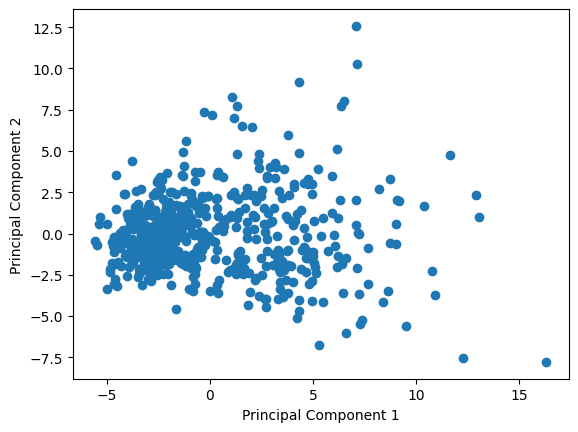

In [6]:
# plot the data points in the reduced 2-dimensional space
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## How models performance changes after usning PCA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Perform PCA on the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
# Train a logistic regression model on the original data
lr_orig = LogisticRegression(random_state=42)
lr_orig.fit(X_train, y_train)
y_pred_orig = lr_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)
print("Accuracy on original data:", acc_orig)

Accuracy on original data: 0.9649122807017544


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Train a logistic regression model on the PCA-transformed data
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy after PCA:", acc_pca)


Accuracy after PCA: 0.9649122807017544


## Comparing PCA and without PCA models performance

In [15]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score

In [16]:
# Compute the confusion matrix for the original data model
cm_orig = confusion_matrix(y_test, y_pred_orig)
print("Confusion matrix for original data model:\n", cm_orig)

Confusion matrix for original data model:
 [[40  3]
 [ 1 70]]


In [17]:
# Compute the AUC score and ROC curve for the original data model
auc_orig = roc_auc_score(y_test, lr_orig.predict_proba(X_test)[:, 1])
fpr_orig, tpr_orig, thresholds_orig = roc_curve(y_test, lr_orig.predict_proba(X_test)[:, 1])

In [18]:
# Compute the confusion matrix for the PCA-transformed data model
cm_pca = confusion_matrix(y_test, y_pred_pca)
print("Confusion matrix for PCA-transformed data model:\n", cm_pca)

Confusion matrix for PCA-transformed data model:
 [[39  4]
 [ 0 71]]


In [19]:
# Compute the AUC score and ROC curve for the PCA-transformed data model
auc_pca = roc_auc_score(y_test, lr_pca.predict_proba(X_test_pca)[:, 1])
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, lr_pca.predict_proba(X_test_pca)[:, 1])

In [20]:
# Compute the F1 score for both models
f1_orig = f1_score(y_test, y_pred_orig)
f1_pca = f1_score(y_test, y_pred_pca)

In [21]:
# Print the results
print("AUC for original data model:", auc_orig)
print("AUC for PCA-transformed data model:", auc_pca)

AUC for original data model: 0.9970520799213888
AUC for PCA-transformed data model: 0.9980347199475925


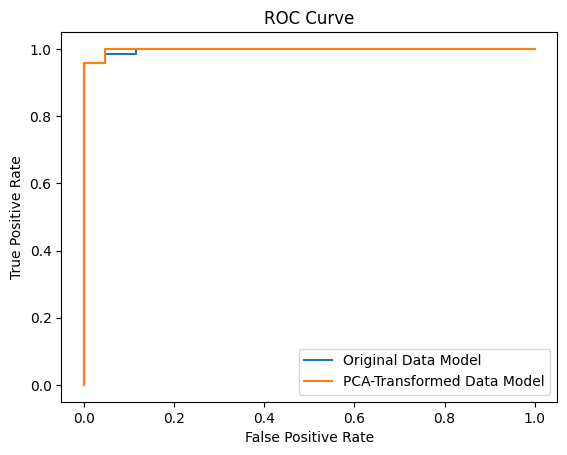

In [22]:
import matplotlib.pyplot as plt
plt.plot(fpr_orig, tpr_orig, label='Original Data Model')
plt.plot(fpr_pca, tpr_pca, label='PCA-Transformed Data Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [23]:
print("F1 score for original data model:", f1_orig)
print("F1 score for PCA-transformed data model:", f1_pca)

F1 score for original data model: 0.9722222222222222
F1 score for PCA-transformed data model: 0.9726027397260273


## Using Multipule models and comparing their performances 

In [24]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to compare
classifiers = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(random_state=42),
    MLPClassifier(random_state=42)
]

# Train and evaluate each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(type(clf).__name__)
    print("Accuracy: {:.4f}, F1 Score: {:.4f}, AUC: {:.4f}".format(acc, f1, auc))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Accuracy: 0.9649, F1 Score: 0.9722, AUC: 0.9971
DecisionTreeClassifier
Accuracy: 0.9474, F1 Score: 0.9577, AUC: 0.9440
RandomForestClassifier
Accuracy: 0.9649, F1 Score: 0.9722, AUC: 0.9953
GradientBoostingClassifier
Accuracy: 0.9561, F1 Score: 0.9650, AUC: 0.9951
KNeighborsClassifier
Accuracy: 0.9561, F1 Score: 0.9660, AUC: 0.9959
GaussianNB
Accuracy: 0.9737, F1 Score: 0.9793, AUC: 0.9984


AttributeError: ignored

In [25]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42),
    'Multi-Layer Perceptron': MLPClassifier(random_state=42)
}

# Train and evaluate each classifier
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    results.append([name, acc, f1, auc])

# Print the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'F1 Score', 'AUC'])
print(results_df)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: ignored

In [26]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Multi-Layer Perceptron': MLPClassifier(random_state=42)
}

# Train and evaluate each classifier
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    results.append([name, acc, f1, auc])

# Print the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'F1 Score', 'AUC'])
print(results_df)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               Classifier  Accuracy  F1 Score       AUC
0     Logistic Regression  0.964912  0.972222  0.997052
1           Decision Tree  0.947368  0.957746  0.943990
2           Random Forest  0.964912  0.972222  0.995251
3       Gradient Boosting  0.956140  0.965035  0.995087
4     K-Nearest Neighbors  0.956140  0.965986  0.995906
5             Naive Bayes  0.973684  0.979310  0.998362
6  Support Vector Machine  0.947368  0.959459  0.993449
7  Multi-Layer Perceptron  0.938596  0.953020  0.996069


In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from xgboost import XGBClassifier

# Define a list of classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Multi-Layer Perceptron': MLPClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Gaussian Process': GaussianProcessClassifier(random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Complement Naive Bayes': ComplementNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Radius Neighbors': RadiusNeighborsClassifier(),
    'Label Propagation': LabelPropagation(),
    'Label Spreading': LabelSpreading(),
    'Extra Tree': ExtraTreeClassifier(random_state=42),
    'One-vs-Rest': OneVsRestClassifier(LogisticRegression(random_state=42)),
    'One-vs-One': OneVsOneClassifier(LogisticRegression(random_state=42)),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate each classifier
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    results.append([name, acc, f1, auc])

# Print the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'F1 Score', 'AUC'])
print(results_df)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: ignored

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Multi-Layer Perceptron': MLPClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Gaussian Process': GaussianProcessClassifier(random_state=42),
    'Passive Aggressive': PassiveAggressiveClassifier(random_state=42),
    'Ridge': RidgeClassifier(random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Complement Naive Bayes': ComplementNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Radius Neighbors': RadiusNeighborsClassifier(),
    'Label Propagation': LabelPropagation(),
    'Label Spreading': LabelSpreading(),
    'Extra Tree': ExtraTreeClassifier(random_state=42),
    'One-vs-Rest': OneVsRestClassifier(LogisticRegression(random_state=42)),
    'One-vs-One': OneVsOneClassifier(LogisticRegression(random_state=42)),
    'XGBoost': XGBClassifier(random_state=42),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'CatBoostClassifier': CatBoostClassifier(random_state=42, verbose=0),
    'SVC': SVC(random_state=42),
    'NuSVC': NuSVC(random_state=42),
    'LinearSVC': LinearSVC(random_state=42),
    '


## PCA ON BREAST CANCER
* We have appllied PCA on breast cancer data but still we need to make it easy to understand to each team member.
* Next step is to make a model with pca and without pca
* Use PCA codes of Priya Sing
* Read understand and implement codes of Machine Learning Mastery site



## Priya

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf.head(2)

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
